In [1]:
import pandas as pd
import pickle

# Load processed dataset
df = pd.read_csv("../data/processed/cleaned_data.csv")

# Drop string columns (IMPORTANT)
df = df.drop(["UDI", "Product ID"], axis=1)

# Convert categorical Type column if exists
if "Type" in df.columns:
    df = pd.get_dummies(df, columns=["Type"], drop_first=True)

# Define X and y
X = df.drop("Machine failure", axis=1)
y = df["Machine failure"]

# Load model
with open("../models/final_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Data and model ready!")

Data and model ready!


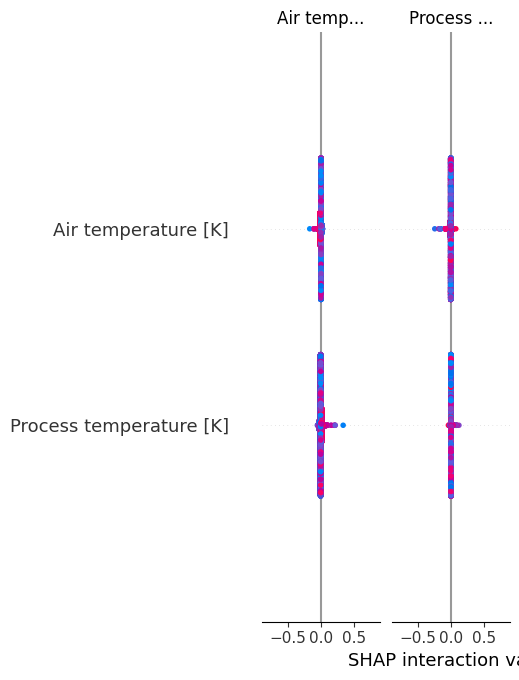

In [2]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X)
else:
    shap.summary_plot(shap_values, X)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9661
           1       1.00      0.99      1.00       339

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



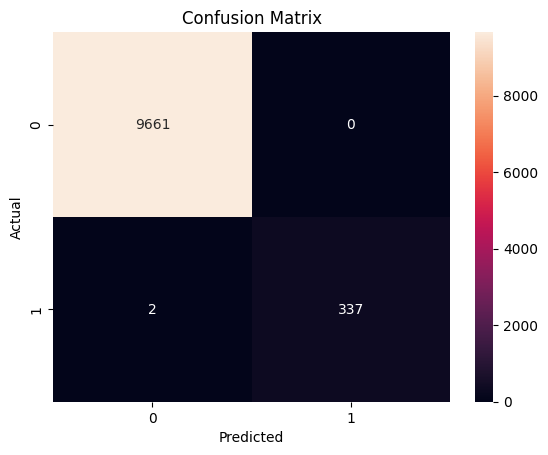

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X)

# Report
print(classification_report(y, y_pred))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [4]:
import pickle

with open("../models/factoryguard_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Final model saved successfully!")

Final model saved successfully!
